### Loan Eligibility Prediction

In [3]:
#importing relevant libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score, classification_report

### Loading Train and Test Data

In [56]:
train_loan_df = pd.read_csv('loan-train.csv')
test_loan_df = pd.read_csv('loan-test.csv')

In [57]:
#Let's see sample Data
train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
#Shape of dataset (Rows, Columns)
train_loan_df.shape

(614, 13)

#### There are 614 records with 13 different columns/fields to analyze

In [59]:
#Statistics of each field
train_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [60]:
#Information of Each Field (null values, data type)
train_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Let's Drop Loan_Id as it does not hold any significance

In [61]:
df = train_loan_df.drop('Loan_ID', axis = 1)
test_df = test_loan_df.drop('Loan_ID', axis = 1)

In [62]:
df.Loan_Status.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

We can see this data is in text form "Y" and "N", Let's convert it into numeric 

In [63]:
#Mapping 'Y' as 1 and 'N'as 0
df.Loan_Status = df.Loan_Status.map({'Y':1, 'N':0})

In [64]:
df.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [65]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Changing Credit History's data type as object As there are only two values '0' and '1'

In [66]:
df['Credit_History'].loc[df.Credit_History == 1.0] = 'one'
df['Credit_History'].loc[df.Credit_History == 0.0] = 'zero'

test_df['Credit_History'].loc[test_df.Credit_History == 1.0] = 'one'
test_df['Credit_History'].loc[test_df.Credit_History == 0.0] = 'zero'

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,one,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,one,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,one,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,one,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,one,Urban,1


We can see above, our changes are reflected for Loan_Status and Credit_History

### Univariate Analysis (analysis of one (“uni”) variable.)

In [77]:
print(set(df.dtypes)) #data contains 3 data types 0 means object

{dtype('int64'), dtype('float64'), dtype('O')}


In [68]:
cat_cols = df.select_dtypes('object').columns #all Categorical columns
num_cols = df.select_dtypes(['int64', 'float64']).columns #all Numerical columns

In [81]:
print('Categorical columns :',list(cat_cols))
print('Numerical columns :',list(num_cols))

Categorical columns : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
Numerical columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']


#### Count plots for categorical columns

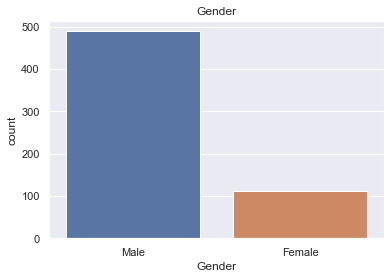

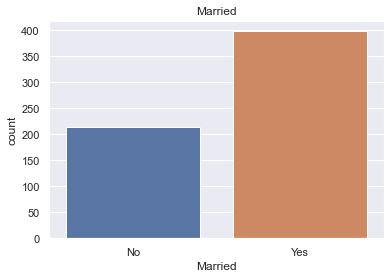

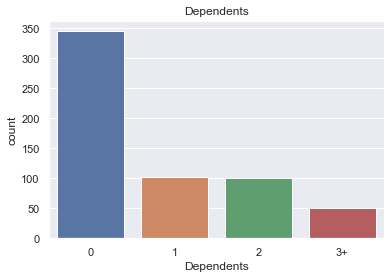

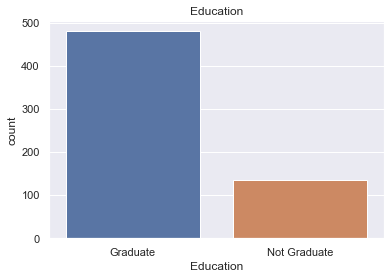

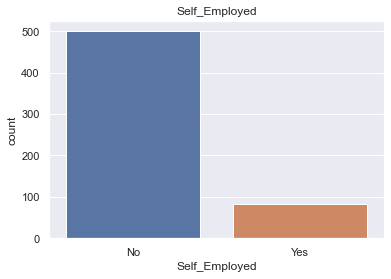

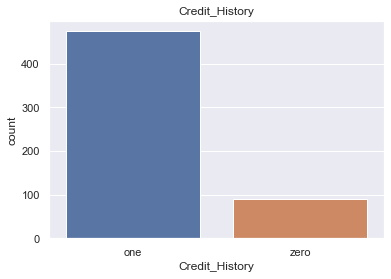

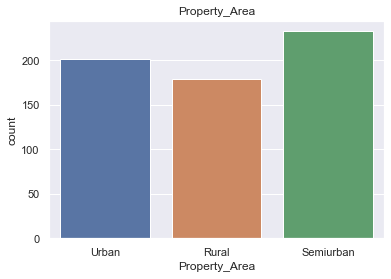

In [82]:
for col in cat_cols:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()
    print('\n\n')

#### Histograms for numerical columns

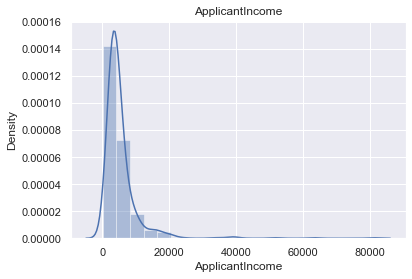

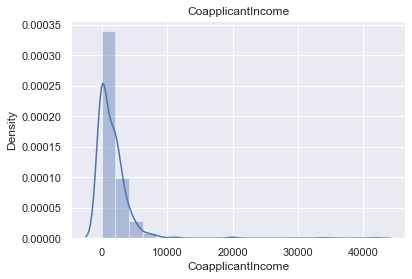

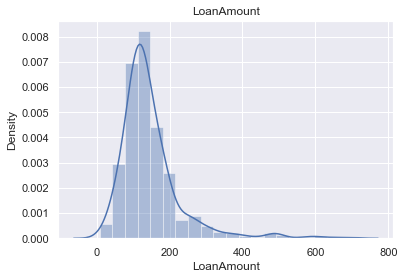

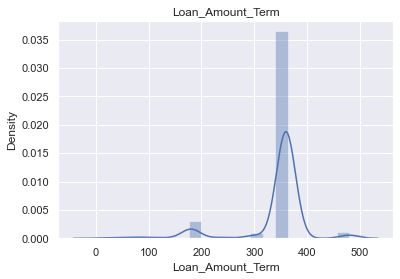

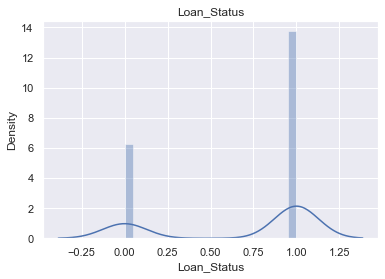

In [85]:
for col in num_cols:
    sns.distplot(df[col], bins = 20)
    plt.title(col)
    plt.show()
    print('\n\n')

### Bivariate Analysis(analysis of exactly two variables)

#### Plotting BAR CHARTS for Categorical data comparing with Loan_Status

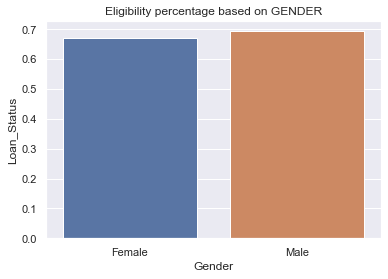

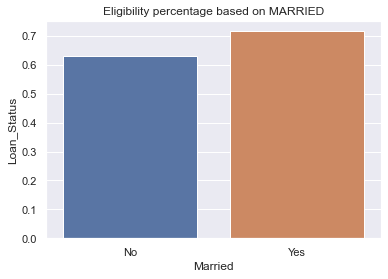

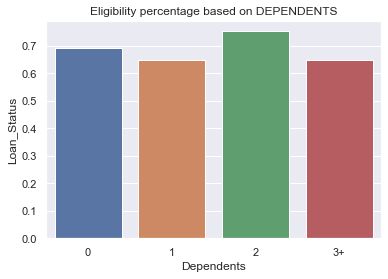

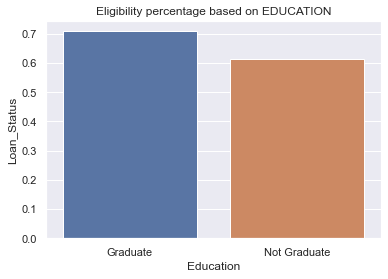

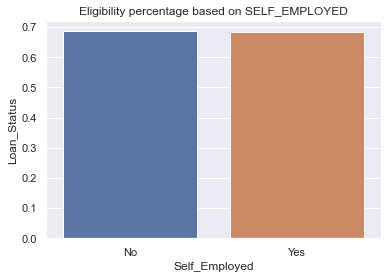

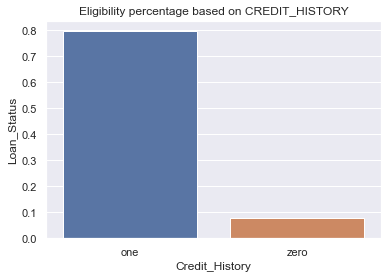

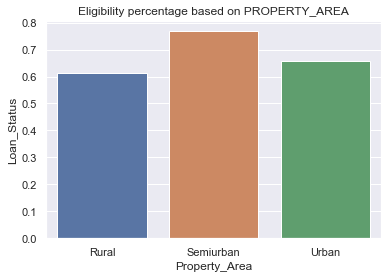

In [86]:
for col in cat_cols:
    sns.barplot(data = df.groupby(col)['Loan_Status'].mean().reset_index() ,x=col ,y="Loan_Status")
    plt.title('Eligibility percentage based on '+ col.upper())
    plt.show()
    print('\n\n') 

#### From this we can conclude that:

1. Male has slightly higher chance for being eligible for loan
2. Married people have more chances of being approved for the loan
3. People with 2 or no dependents have more chances than people with more than 3 dependednts.
4. Graduate individual has more chances of getting an approval
5. Self employes or not, both has similar chance of getting an approval
6. People living in semiurban area are more likely to get a loan approved
7. People with credit history with 1.0 is more likely to get approved

#### Loan status comparison with numerical variable

In [87]:
for i in num_cols:
    if i != 'Loan_Status':
        print(df.groupby('Loan_Status')[i].median().reset_index())
        print('\n\n')

   Loan_Status  ApplicantIncome
0            0           3833.5
1            1           3812.5



   Loan_Status  CoapplicantIncome
0            0              268.0
1            1             1239.5



   Loan_Status  LoanAmount
0            0       129.0
1            1       126.0



   Loan_Status  Loan_Amount_Term
0            0             360.0
1            1             360.0





#### We can conclude:

1. The median Applicant income of eligible cadidates is 3812.5
2. The median Coapplicant income of eligible cadidates is 1239.5
3. The median Loan amount of eligible cadidates is 126.0
4. The median Loan amount term of eligible cadidates is 360.0

### Dealing with missing values

In [88]:
# shows number of null values each column having
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling numerical data with median 

In [89]:
for col in num_cols:
        df[col].fillna(df[col].median(), inplace = True)
df.isna().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling categorical data with mode

In [90]:
#getting mode for each categorical column
for col in cat_cols:
    print(col, df[col].mode())

Gender 0    Male
Name: Gender, dtype: object
Married 0    Yes
Name: Married, dtype: object
Dependents 0    0
Name: Dependents, dtype: object
Education 0    Graduate
Name: Education, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    one
Name: Credit_History, dtype: object
Property_Area 0    Semiurban
Name: Property_Area, dtype: object


In [91]:
test_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Replacing Null values of categorical columns with Mode values

In [93]:
df.Gender.fillna('Male', inplace = True)
df.Married.fillna('Yes', inplace = True)
df.Dependents.fillna('0', inplace = True)
df.Self_Employed.fillna('No', inplace = True)


test_df.Gender.fillna('Male', inplace = True)
test_df.Dependents.fillna('0', inplace = True)
test_df.Self_Employed.fillna('No', inplace = True)

#numerica variables of test data filling with median
test_df.LoanAmount.fillna(test_df.LoanAmount.median(), inplace = True)
test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.median(), inplace = True)

#### Filling credit history Null values with 'na'

In [94]:
df.Credit_History.fillna('na', inplace = True)

test_df.Credit_History.fillna('na', inplace = True)

In [95]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now, We can see we have 0 columns with Null Values

### Balancing datase

In [99]:
#we have to predict the loan status so let's see distrubution of 'Loan status columns'
print(len(df.loc[df.Loan_Status == 0]))
print(len(df.loc[df.Loan_Status == 1]))

192
422


We can see Loan status(1) > Loan status(2)... so Let's balance that with each count is same

In [100]:
loan_1 = df.loc[df.Loan_Status == 1].sample(192, random_state = 0)
loan_0 = df.loc[df.Loan_Status == 0]
data = pd.concat([loan_1, loan_0], axis = 0)
#concataned rowwise

In [104]:
data.shape

(384, 12)

In [103]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
397,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,one,Urban,1
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,one,Rural,1
37,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,one,Semiurban,1
337,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,one,Rural,1
263,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,one,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,one,Rural,0
597,Male,No,0,Graduate,No,2987,0.0,88.0,360.0,zero,Semiurban,0
600,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,na,Urban,0
605,Male,Yes,0,Not Graduate,No,2400,3800.0,128.0,180.0,one,Urban,0


We have to reindex the data

In [105]:
balanced_data = data.reset_index(drop = True)

In [106]:
balanced_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,one,Urban,1
1,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,one,Rural,1
2,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,one,Semiurban,1
3,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,one,Rural,1
4,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,one,Rural,1


### Let's split into Variables and Label

In [107]:
#Preparing Test Data
X = balanced_data.drop('Loan_Status', axis = 1)
y = balanced_data['Loan_Status']

x_test = test_df

### Scaling data

#### Scaling numerical variable with standard scaler

In [108]:
num_cols = X.select_dtypes(['int64', 'float64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[num_cols])

scaled_test = scaler.fit_transform(x_test[num_cols])

In [109]:
scaled_test

array([[ 0.1864605 , -0.67333511, -0.42677996,  0.26602207],
       [-0.35269225, -0.02984821, -0.16395333,  0.26602207],
       [ 0.0396413 ,  0.09884917,  1.18303317,  0.26602207],
       ...,
       [-0.31721094,  0.18164449, -0.16395333,  0.26602207],
       [ 0.0396413 ,  0.353241  ,  0.36169994,  0.26602207],
       [ 0.89608667, -0.67333511, -0.62389994, -2.52163936]])

#### Scaling Catergorical variable with Encoding

In [110]:
cat_cols = X.select_dtypes('object').columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
encoded_data = encoder.fit_transform(X[cat_cols])

encoded_test = encoder.fit_transform(test_df[cat_cols])

In [111]:
encoded_test

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

#### Concatinating scaled numeric and categorical columns

In [112]:
scaled_X = pd.DataFrame(scaled_data, columns = num_cols)
encoded_X = pd.DataFrame(encoded_data, columns = encoder.get_feature_names())
X_preprocessed = pd.concat([scaled_X, encoded_X], axis = 1)

scaled_X_test = pd.DataFrame(scaled_test, columns = num_cols)
encoded_X_test = pd.DataFrame(encoded_test, columns = encoder.get_feature_names())
X_test_preprocessed = pd.concat([scaled_X_test,encoded_X_test ], axis = 1)

In [113]:
X_preprocessed
# See everything is on one scale

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,x0_Female,x0_Male,x1_No,x1_Yes,x2_0,x2_1,...,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x5_na,x5_one,x5_zero,x6_Rural,x6_Semiurban,x6_Urban
0,-0.356616,-0.071917,-0.598759,0.268285,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.422439,-0.001589,-0.459770,0.268285,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.260236,-0.071917,-0.031218,0.268285,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.437641,0.844678,0.339420,0.268285,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.276842,-0.497677,-0.309197,0.268285,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.152644,-0.205861,0.466828,0.268285,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
380,-0.363608,-0.497677,-0.679836,0.268285,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
381,-0.754446,11.661432,2.354769,-2.447570,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
382,-0.452843,0.611225,-0.216538,-2.447570,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Splitting data into training and validation data

In [55]:
x_train, x_valid, y_train, y_valid = tts(X_preprocessed,y , test_size = 0.1, random_state = 0, stratify = y)

### Comparing Logistic Regression and SVM Model

### Logistic regression

In [115]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 250)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=250)

In [116]:
preds_lr = model_lr.predict(x_valid)

In [117]:
print('Accuracy score for Logistic regression: {0}\nF1 score for Logistic regression: {1} '.format(accuracy_score(preds_lr, y_valid),f1_score(preds_lr, y_valid)))

Accuracy score for Logistic regression: 0.5897435897435898
F1 score for Logistic regression: 0.6190476190476191 


In [119]:
print('LOGISTICS REGRESSION\n')
print(classification_report(preds_lr, y_valid))

LOGISTICS REGRESSION

              precision    recall  f1-score   support

           0       0.50      0.62      0.56        16
           1       0.68      0.57      0.62        23

    accuracy                           0.59        39
   macro avg       0.59      0.60      0.59        39
weighted avg       0.61      0.59      0.59        39



In [120]:
model_lr.predict(X_test_preprocessed)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

### Support Vector Mahcine

In [122]:
from sklearn import svm
model_sv = svm.SVC(kernel='linear', random_state = 0)
model_sv.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [123]:
preds_sv = model_sv.predict(x_valid)
print('Accuracy score for SVM: {0}\nF1 score for SVM: {1} '.format(accuracy_score(preds_sv, y_valid),f1_score(preds_sv, y_valid)))

Accuracy score for SVM: 0.6410256410256411
F1 score for SVM: 0.72 


In [124]:
print('SUPPORT VECTOR\n')
print(classification_report(preds_sv, y_valid))

SUPPORT VECTOR

              precision    recall  f1-score   support

           0       0.35      0.88      0.50         8
           1       0.95      0.58      0.72        31

    accuracy                           0.64        39
   macro avg       0.65      0.73      0.61        39
weighted avg       0.82      0.64      0.67        39



We can see SVM giving accuracy of 64% which is good compared to Logistic Regression with 58%